### -------------------------------------------------------------------------------------------------------------------------------------------------------------
## Index: 194082P
## Name: Kudagodage N.E.
### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Solution for the Machine Learning and Pattern Recognition Assignment (CM 4370).





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import rcParams
from math import sqrt
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

rcParams['figure.figsize'] = 11.7, 8.27

##Load dataset


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
file_path = '/content/gdrive/My Drive/Colab Notebooks/ML/Data/weatherHistory.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## a) Preprocess the dataset



Preprocessing stands as the initial step in the machine learning pipeline, where we enhance the reliability and consistency of our datasets prior to their utilization in machine learning models. This critical preprocessing phase serves to enhance model accuracies. Within the first section, I undertake fundamental preprocessing procedures to ensure that my dataset attains a refined and organized appearance. The preprocessing techniques that are included in this sections are,
   
       1. Handling missing values: It identifies and removes rows with missing values in the "Precip Type" column.
       2. Handling outliers: It identifies outliers in several numeric columns and applies a percentile-based method to remove or replace these outliers.
       3. Data transformation: Skewness of numeric features is checked, and appropriate transformations like logarithm or exponential are applied to make the data distribution more normal.
       4. Feature coding: Categorical columns like "Summary," "Precip Type," and "Daily Summary" are transformed into numerical values.
       5. Scaling: Numeric columns are scaled using Min-Max scaling to bring them within a specified range (usually [0, 1]).
        

##I.Handle Missing Values



*   Here the output is 'Precip Type'. That means the particular column has null values.



In [ ]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
95931,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
95932,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
95933,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
95934,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
column_names = ["Summary", "Precip Type", "Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Loud Cover", "Pressure (millibars)", "Daily Summary"]

In [ ]:
y = df['Temperature (C)']
cleaned_df = df.copy().drop(['Temperature (C)', 'Formatted Date', 'Loud Cover'], axis=1)

In [ ]:
cleaned_df

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...
95931,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
95932,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
95933,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
95934,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


##II.Handle Outliers

In [ ]:
df_train_num = cleaned_df.select_dtypes(include=[np.number])
df_train_num

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...
95931,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95932,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95933,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95934,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
class HandleOutliers:

    def __init__(self):
        pass

    def draw_boxplot(self, df, column_name=None, name="Before"):
        if column_name:
            p = sns.boxplot(data = df[column_name])
            p.title.set_text(name + "(" + column_name + ")")
        else:
            sns.boxplot(data = df)

    def percentileCheck(self, df, column_name=None):

        if column_name:
            min_val = df[column_name].quantile(0.05)
            max_val = df[column_name].quantile(0.95)

            outlier_df = df[(df[column_name] < min_val) | (df[column_name] > max_val)]

            return outlier_df
        else:
            print("Provide a valid Column Name")

    def percentileRemove(self, df, column_name=None):

        if column_name:
            min_val = df[column_name].quantile(0.05)
            max_val = df[column_name].quantile(0.95)

            df_2 = df.copy()

            df_2[column_name] = np.where(df_2[column_name] > max_val, max_val, df_2[column_name])
            df_2[column_name] = np.where(df_2[column_name] < min_val, min_val, df_2[column_name])

            return df_2
        else:
            print("Provide a valid Column Name")


outlier_object = HandleOutliers()

(95936, 9)
(9585, 9)


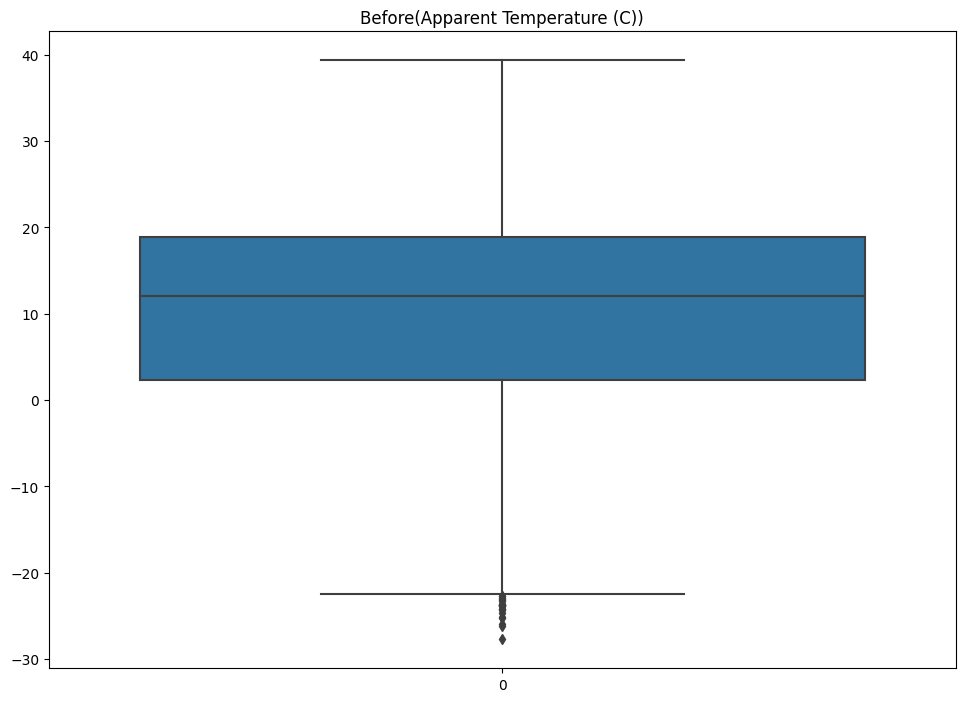

In [ ]:
outlier_object.draw_boxplot(cleaned_df, 'Apparent Temperature (C)')
print(cleaned_df.shape)

outlier_df_per_1 = outlier_object.percentileCheck(cleaned_df, 'Apparent Temperature (C)')
print(outlier_df_per_1.shape)

(95936, 9)
(95936, 9)


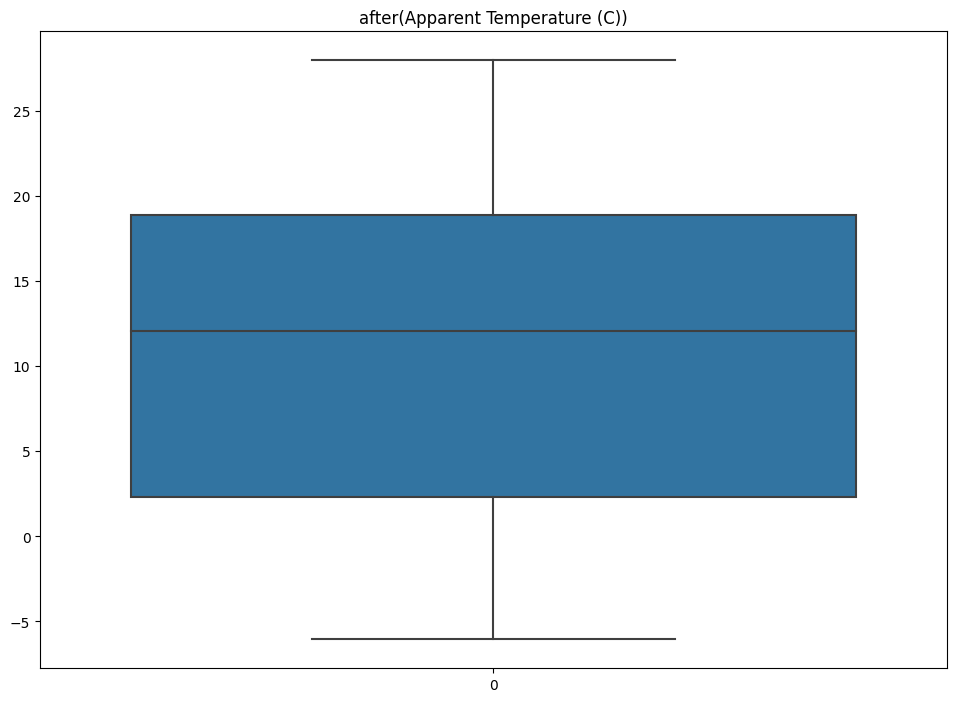

In [ ]:
cleaned_per_df = outlier_object.percentileRemove(cleaned_df, 'Apparent Temperature (C)')
print(cleaned_per_df.shape)

cleaned_df['Apparent Temperature (C)'] = cleaned_per_df['Apparent Temperature (C)']
outlier_object.draw_boxplot(cleaned_df, 'Apparent Temperature (C)', 'after')
print(cleaned_df.shape)

(95936, 9)
(9121, 9)


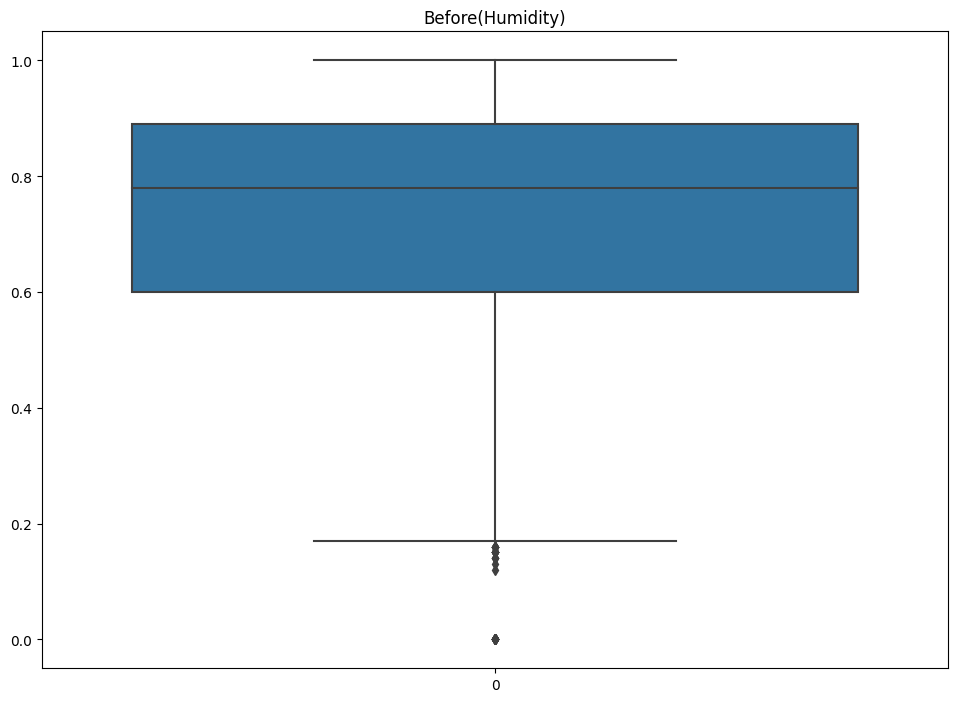

In [ ]:
outlier_object.draw_boxplot(cleaned_df, 'Humidity')
print(cleaned_df.shape)

outlier_df_humidity = outlier_object.percentileCheck(cleaned_df, 'Humidity')
print(outlier_df_humidity.shape)

(95936, 9)
(95936, 9)


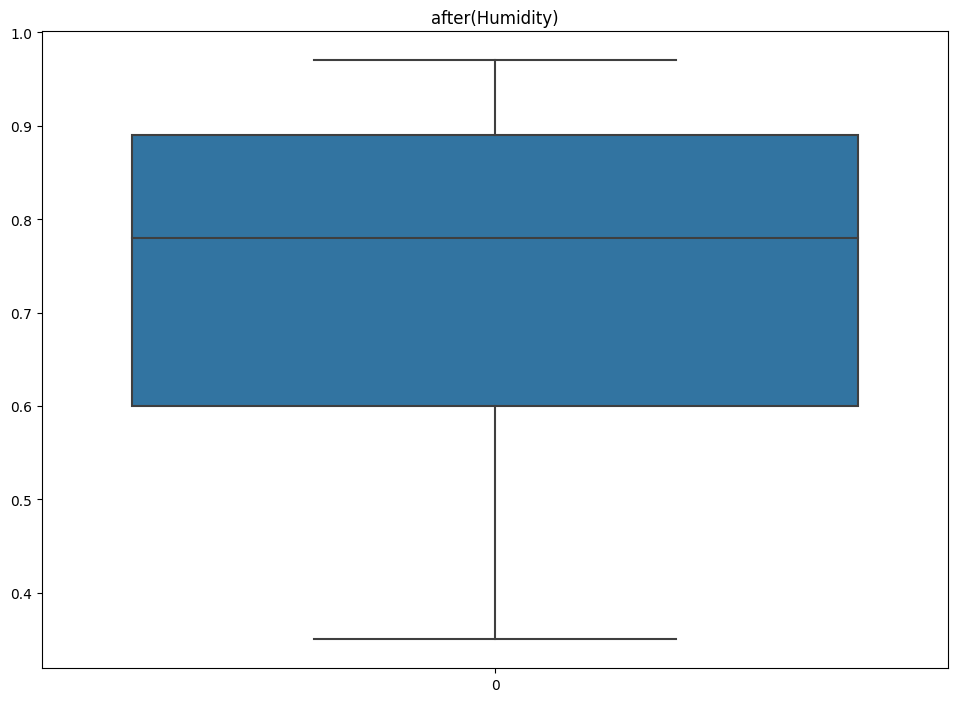

In [ ]:
cleaned_per_df = outlier_object.percentileRemove(cleaned_df, 'Humidity')
print(cleaned_per_df.shape)

cleaned_df['Humidity'] = cleaned_per_df['Humidity']
outlier_object.draw_boxplot(cleaned_df, 'Humidity', 'after')
print(cleaned_df.shape)

(95936, 9)
(9575, 9)


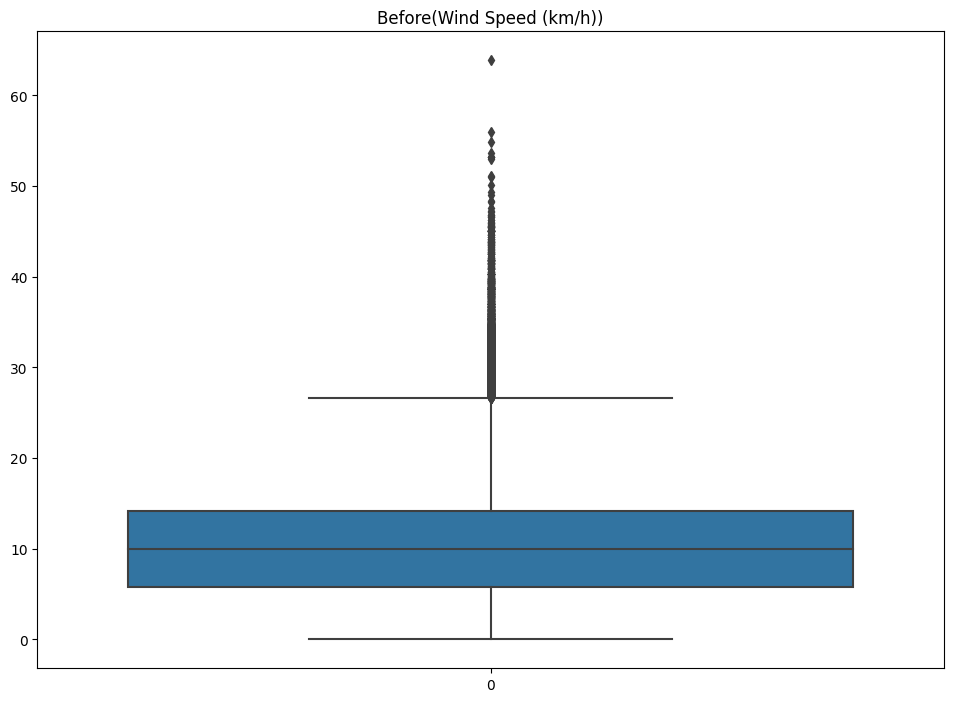

In [ ]:
outlier_object.draw_boxplot(cleaned_df, 'Wind Speed (km/h)')
print(cleaned_df.shape)

outlier_df_wind_speed = outlier_object.percentileCheck(cleaned_df, 'Wind Speed (km/h)')
print(outlier_df_wind_speed.shape)

(95936, 9)
(95936, 9)


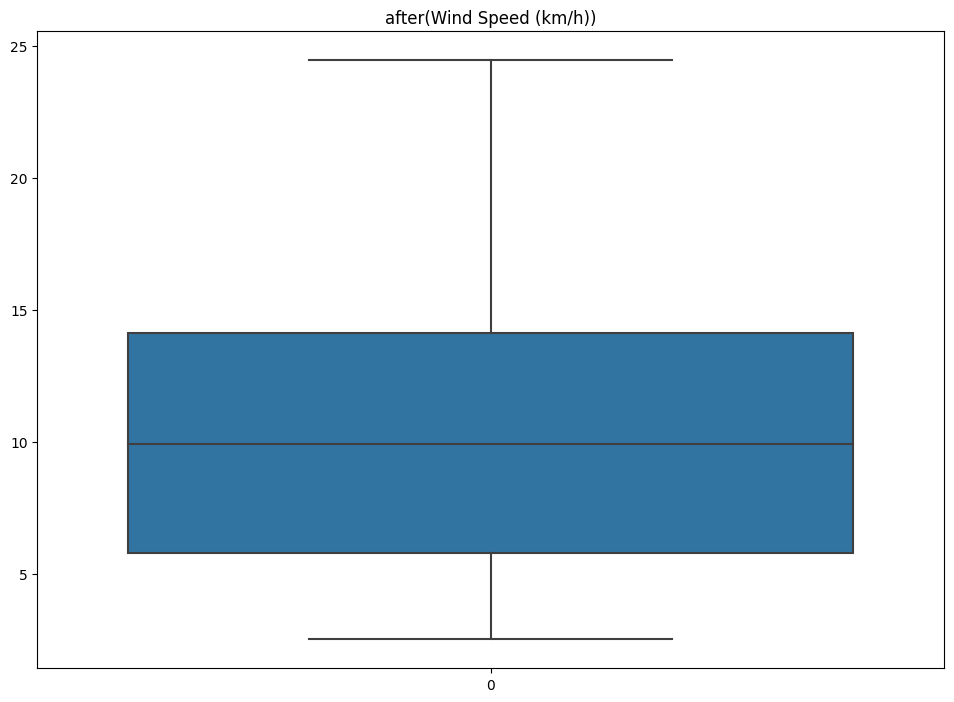

In [ ]:
cleaned_per_df = outlier_object.percentileRemove(cleaned_df, 'Wind Speed (km/h)')
print(cleaned_per_df.shape)

cleaned_df['Wind Speed (km/h)'] = cleaned_per_df['Wind Speed (km/h)']
outlier_object.draw_boxplot(cleaned_df, 'Wind Speed (km/h)', 'after')
print(cleaned_df.shape)

(95936, 9)
(9212, 9)


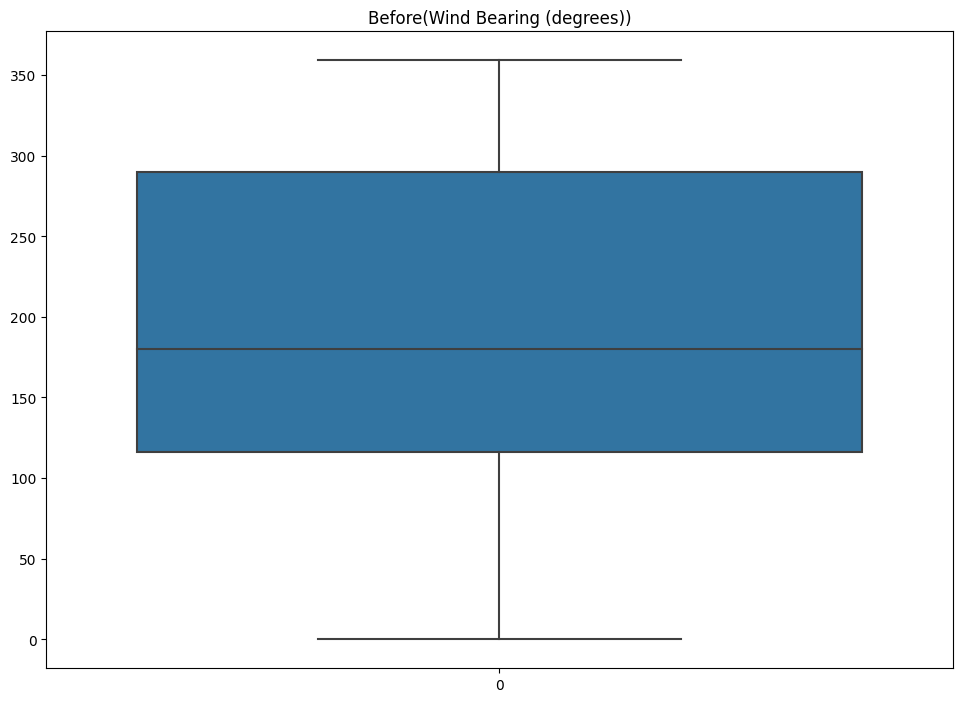

In [ ]:
outlier_object.draw_boxplot(cleaned_df, 'Wind Bearing (degrees)')
print(cleaned_df.shape)

outlier_df_wind_bearing = outlier_object.percentileCheck(cleaned_df, 'Wind Bearing (degrees)')
print(outlier_df_wind_bearing.shape)

(95936, 9)
(95936, 9)


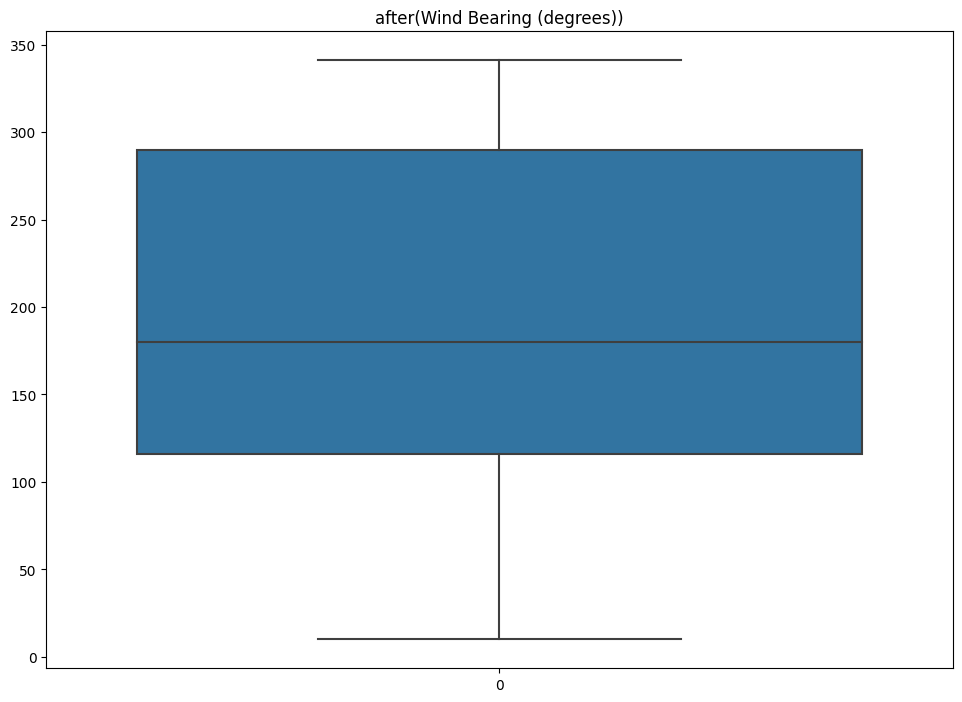

In [ ]:
cleaned_per_df = outlier_object.percentileRemove(cleaned_df, 'Wind Bearing (degrees)')
print(cleaned_per_df.shape)

cleaned_df['Wind Bearing (degrees)'] = cleaned_per_df['Wind Bearing (degrees)']
outlier_object.draw_boxplot(cleaned_df, 'Wind Bearing (degrees)', 'after')
print(cleaned_df.shape)

(95936, 9)
(4791, 9)


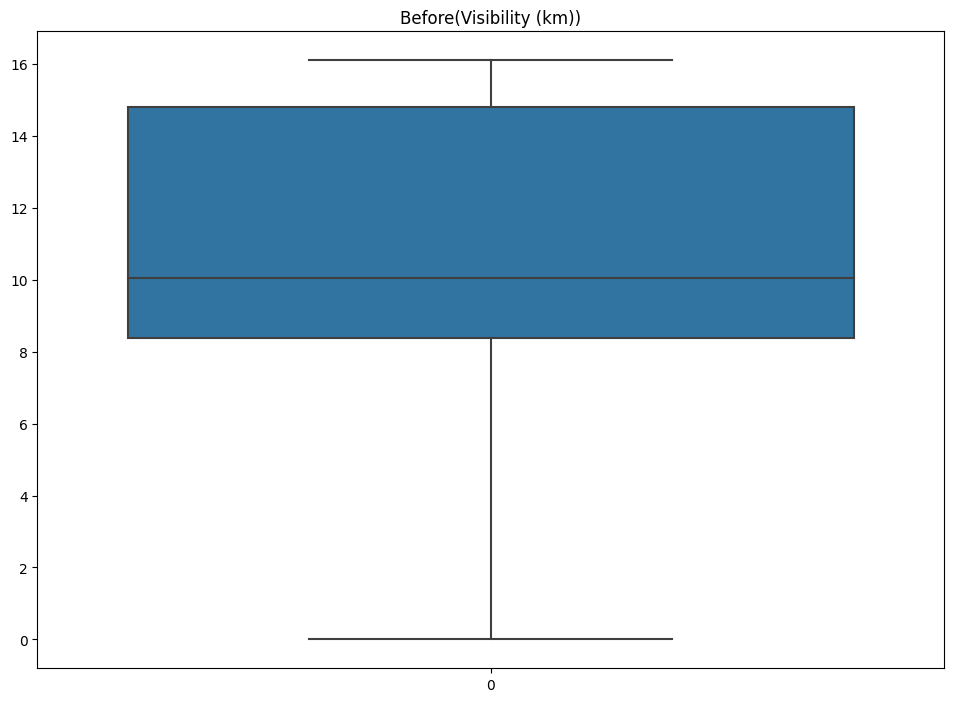

In [ ]:
outlier_object.draw_boxplot(cleaned_df, 'Visibility (km)')
print(cleaned_df.shape)

outlier_df_visibility = outlier_object.percentileCheck(cleaned_df, 'Visibility (km)')
print(outlier_df_visibility.shape)

(95936, 9)
(95936, 9)


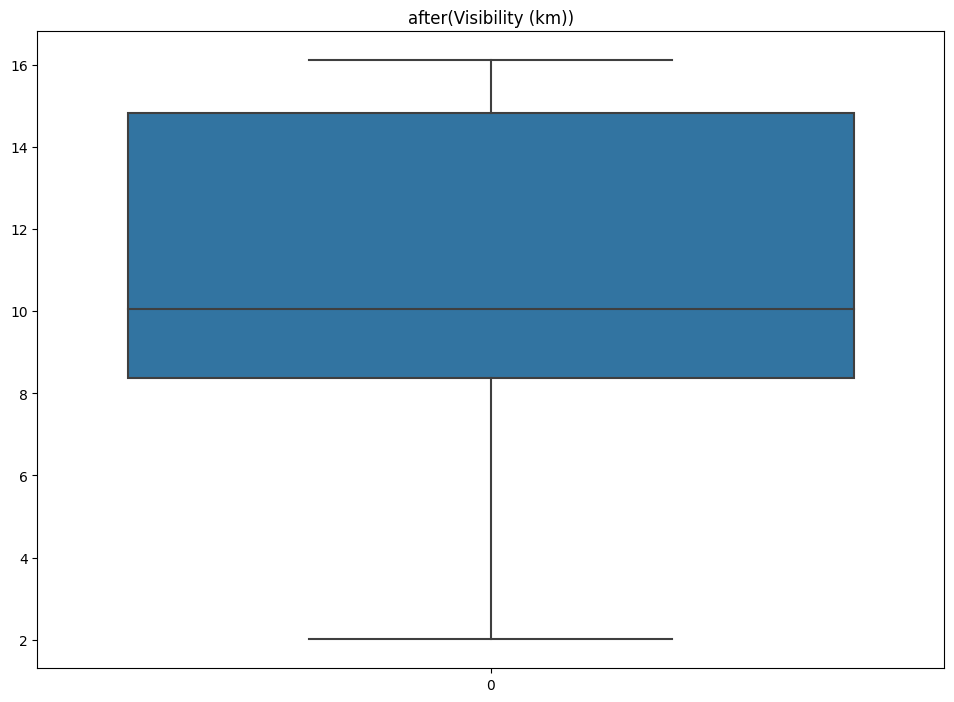

In [ ]:
cleaned_per_df = outlier_object.percentileRemove(cleaned_df, 'Visibility (km)')
print(cleaned_per_df.shape)

cleaned_df['Visibility (km)'] = cleaned_per_df['Visibility (km)']
outlier_object.draw_boxplot(cleaned_df, 'Visibility (km)', 'after')
print(cleaned_df.shape)

(95936, 9)
(9589, 9)


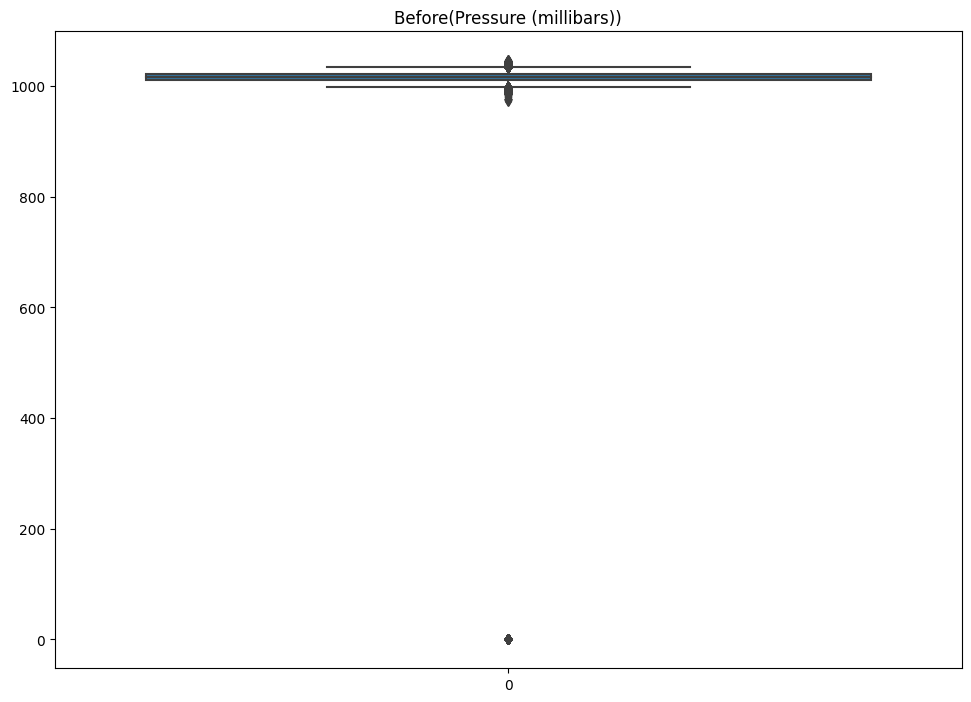

In [ ]:
outlier_object.draw_boxplot(cleaned_df, 'Pressure (millibars)')
print(cleaned_df.shape)

outlier_df_pressure = outlier_object.percentileCheck(cleaned_df, 'Pressure (millibars)')
print(outlier_df_pressure.shape)

(95936, 9)
(95936, 9)


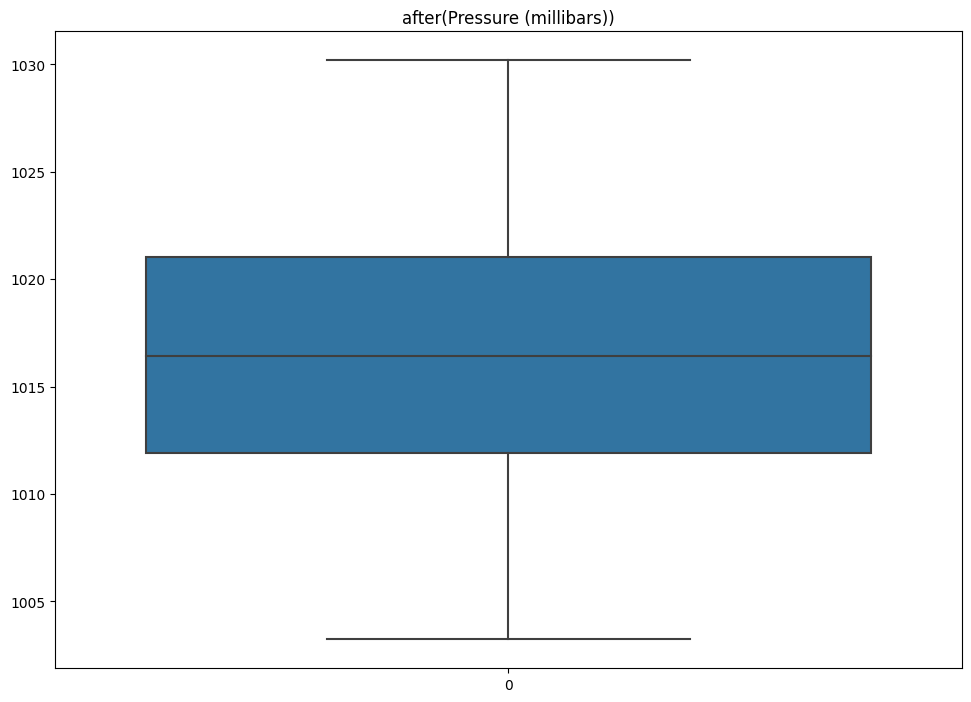

In [ ]:
cleaned_per_df = outlier_object.percentileRemove(cleaned_df, 'Pressure (millibars)')
print(cleaned_per_df.shape)

cleaned_df['Pressure (millibars)'] = cleaned_per_df['Pressure (millibars)']
outlier_object.draw_boxplot(cleaned_df, 'Pressure (millibars)', 'after')
print(cleaned_df.shape)

##III. Apply Transformations


### Transformation Class
#### Transformation Class is defined to,

1. Plot graphs to identify the the shape of the distribution.

   Here I used two different plots to identify the distribution.
    
   - **QQ Plot**
     
   - **Histogram Plot**
   
    
2. Transform the columns that are needed to be transformed.

   Here I perform two main tasks,
   
   - Check the skewness
   - Perform transformation depending on the skewness of the distribution
   
   Ex:
       if skewness is greater than 1 then it's a right skewed distribution. So perform either np.log(Log transformation) or np.sqrt(Squre root transformation).
       
       if skewness is less than -1 then it's a left skewed distribution. So perform either np.reciprocal(Reciprocal transformation) or np.exponential(Power transformation).
   
    


In [ ]:
# Plotting Q-Q Plots and Histogram

class Transformation:

    def __init__(self):
        pass

    def plotQQ(self, df, column_name=None):

        if column_name:
            stats.probplot(df[column_name], dist="norm", plot=plt)
            plt.show()
        else:
            stats.probplot(df, dist="norm", plot=plt)
            plt.show()

    def plotHist(self, df, column_name=None):

        if column_name:
            df[column_name].hist()
        else:
            df.hist()

    def transform(self, df, transform_list):

        #skewness
        skew_values = np.array(df[transform_list].skew(axis=0, skipna=True, numeric_only = False))

        for i in range(len(skew_values)):
            value = skew_values[i]
            if (value > 1):
                logarithm_transformer = FunctionTransformer(np.log, validate=False, check_inverse=True)
                data_update = logarithm_transformer.transform(df[transform_list[i]])
                cleaned_df[transform_list[i]] = data_update

            elif (value < 1):
                exponential_transformer = FunctionTransformer(np.exp)
                data_update = exponential_transformer.transform(df[transform_list[i]])
                cleaned_df[transform_list[i]] = data_update

transformation_object = Transformation()

In [ ]:
cleaned_df.skew(axis=0, skipna=True, numeric_only=True)

Apparent Temperature (C)   -0.032788
Humidity                   -0.643438
Wind Speed (km/h)           0.662867
Wind Bearing (degrees)     -0.158295
Visibility (km)            -0.365408
Pressure (millibars)        0.061647
dtype: float64

### Histogram & Q-Q Plot for Apparent Temperature (C)

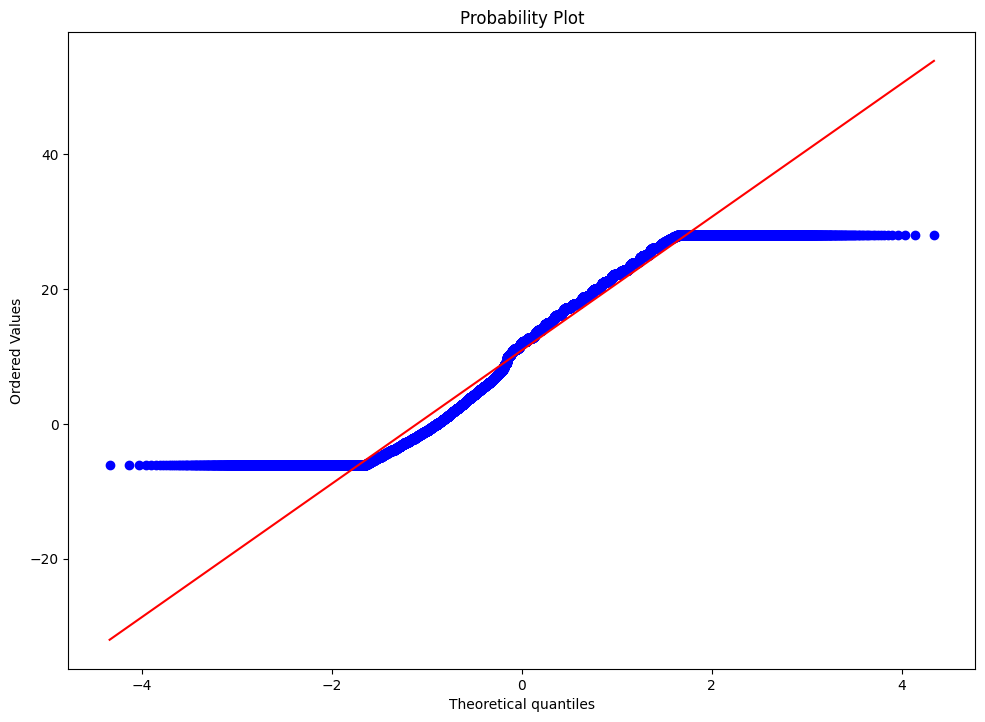

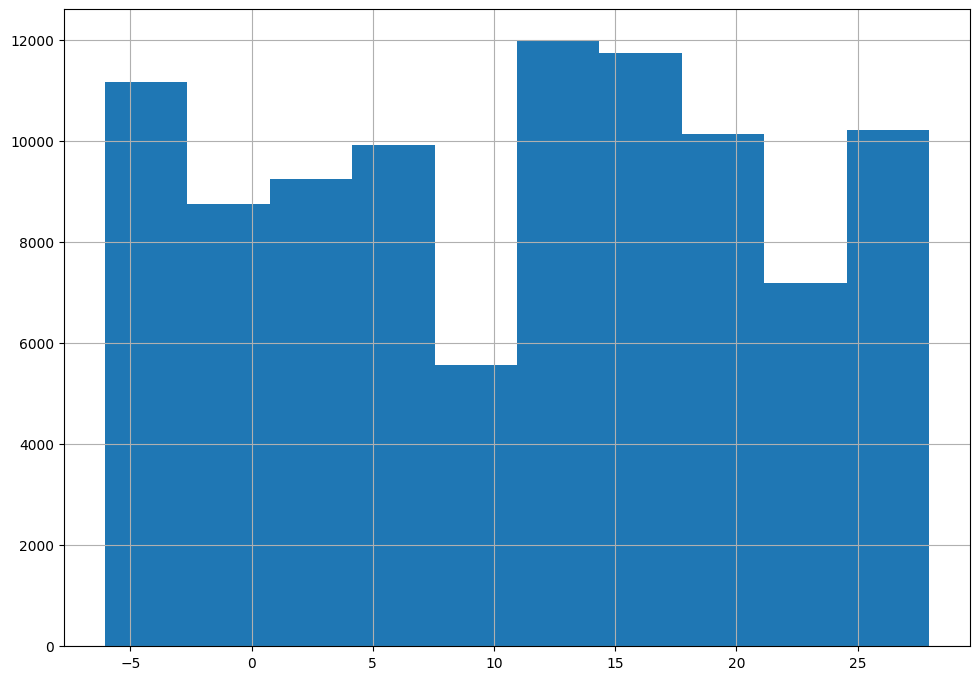

In [ ]:
transformation_object.plotQQ(cleaned_df, 'Apparent Temperature (C)')
transformation_object.plotHist(cleaned_df,'Apparent Temperature (C)')

### Histogram & Q-Q Plot for Humidity

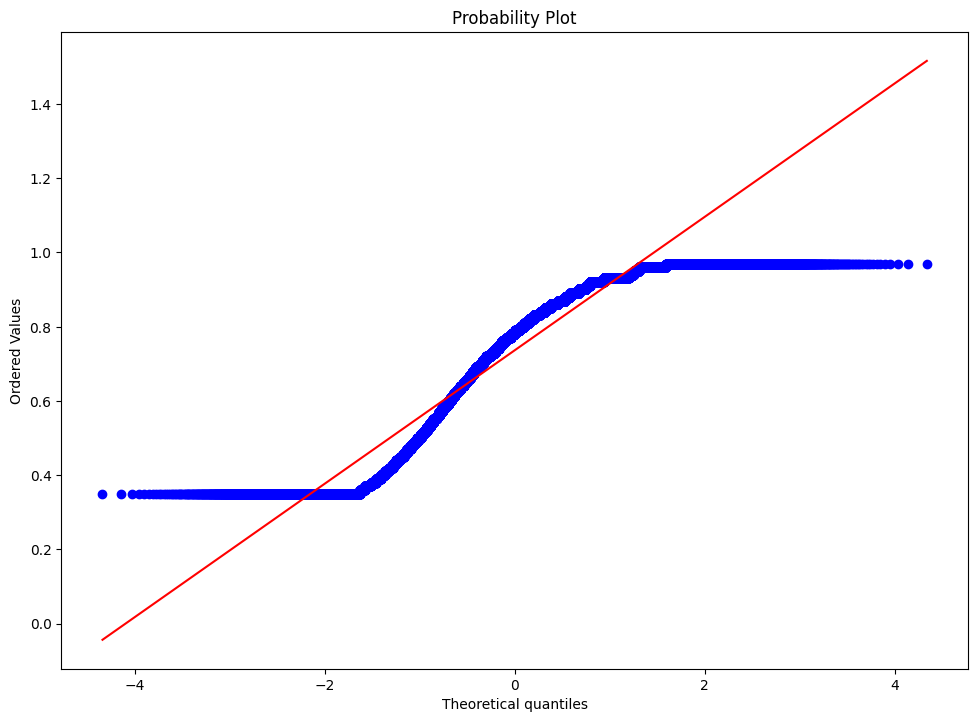

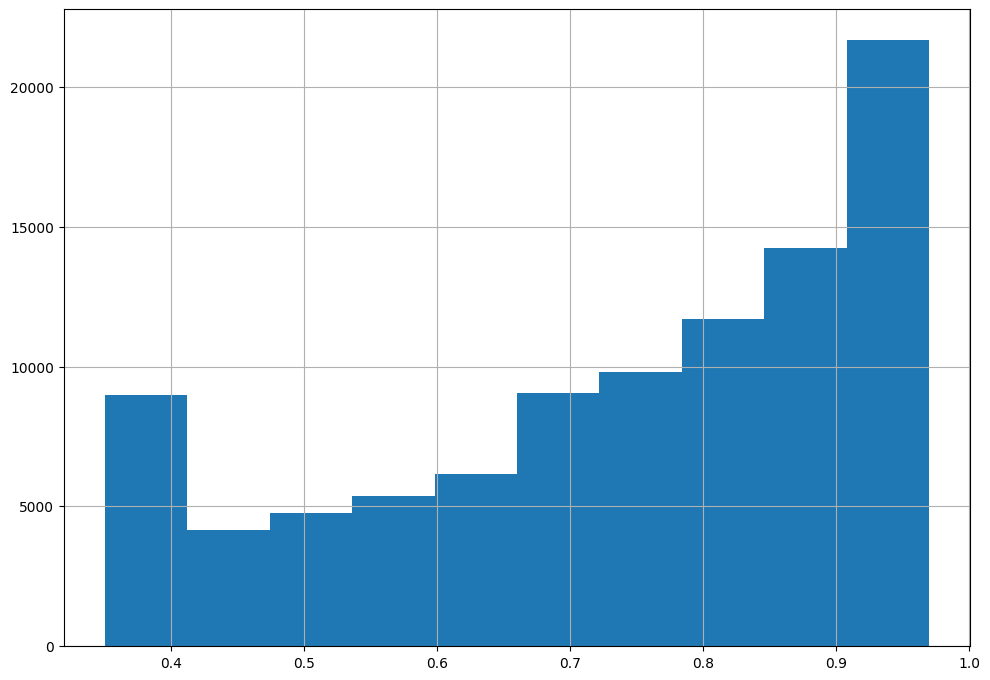

In [ ]:
transformation_object.plotQQ(cleaned_df, 'Humidity')
transformation_object.plotHist(cleaned_df,'Humidity')

### Histogram & Q-Q Plot for Wind Speed (km/h)


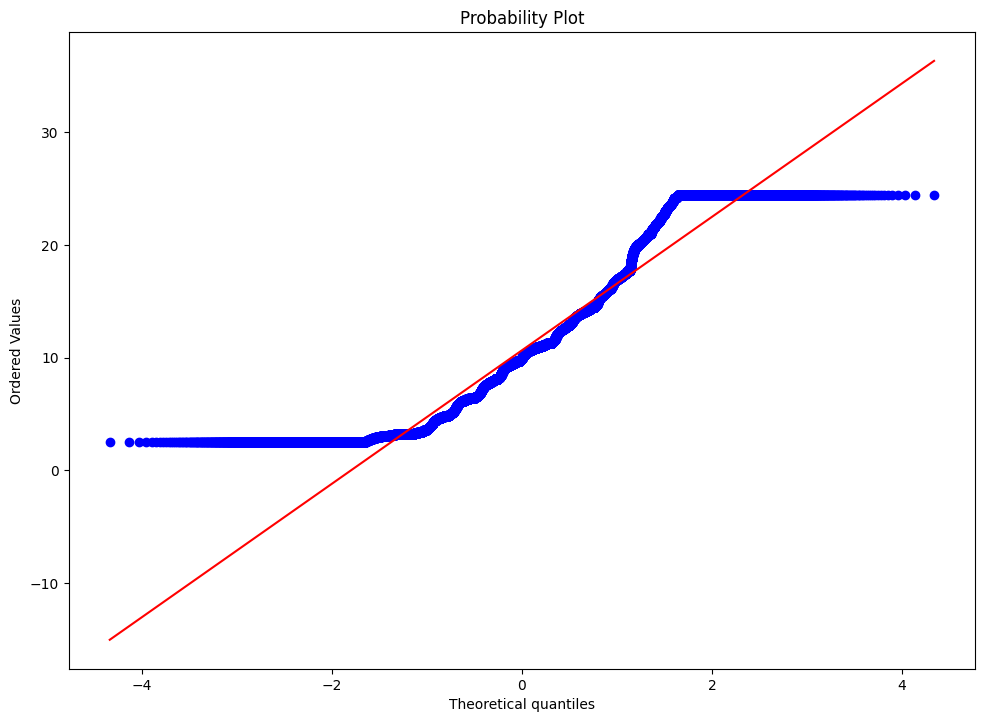

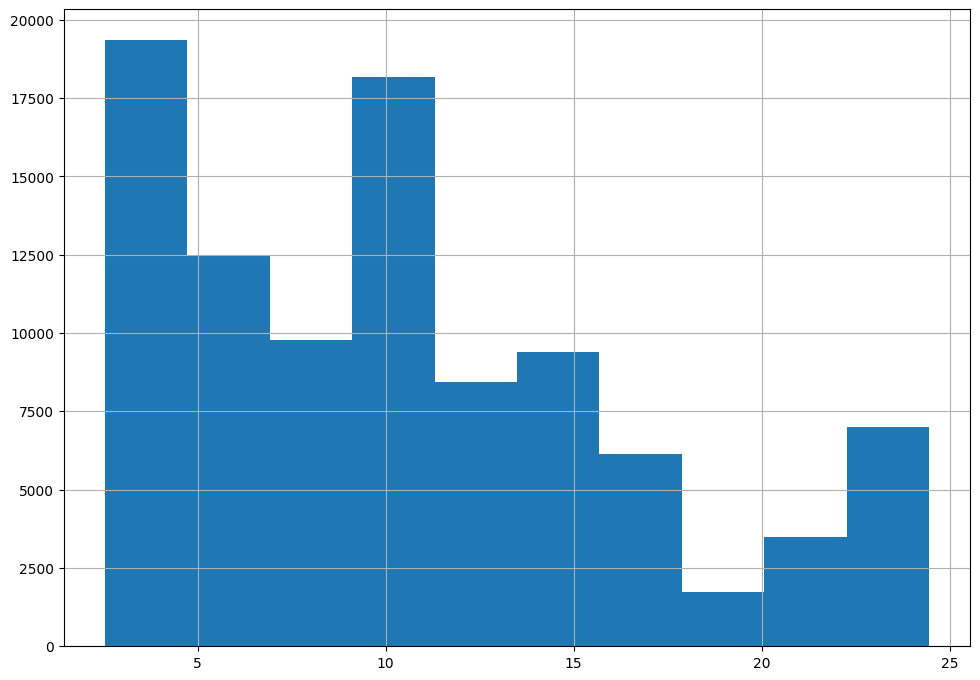

In [ ]:
transformation_object.plotQQ(cleaned_df, 'Wind Speed (km/h)')
transformation_object.plotHist(cleaned_df,'Wind Speed (km/h)')

### Histogram & Q-Q Plot for Wind Bearing (degrees)

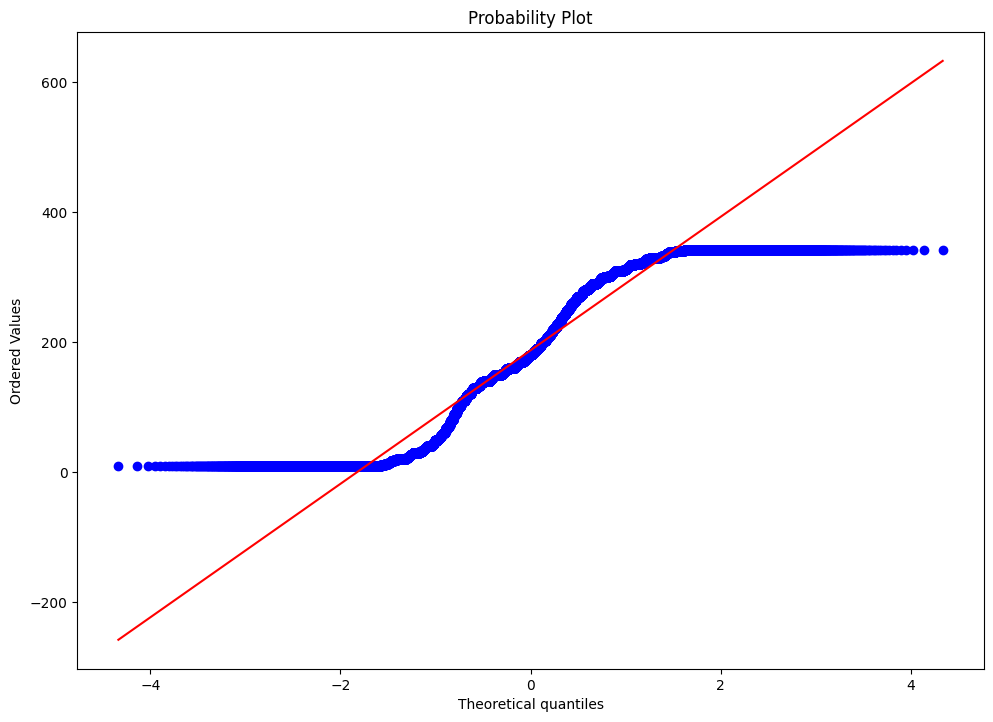

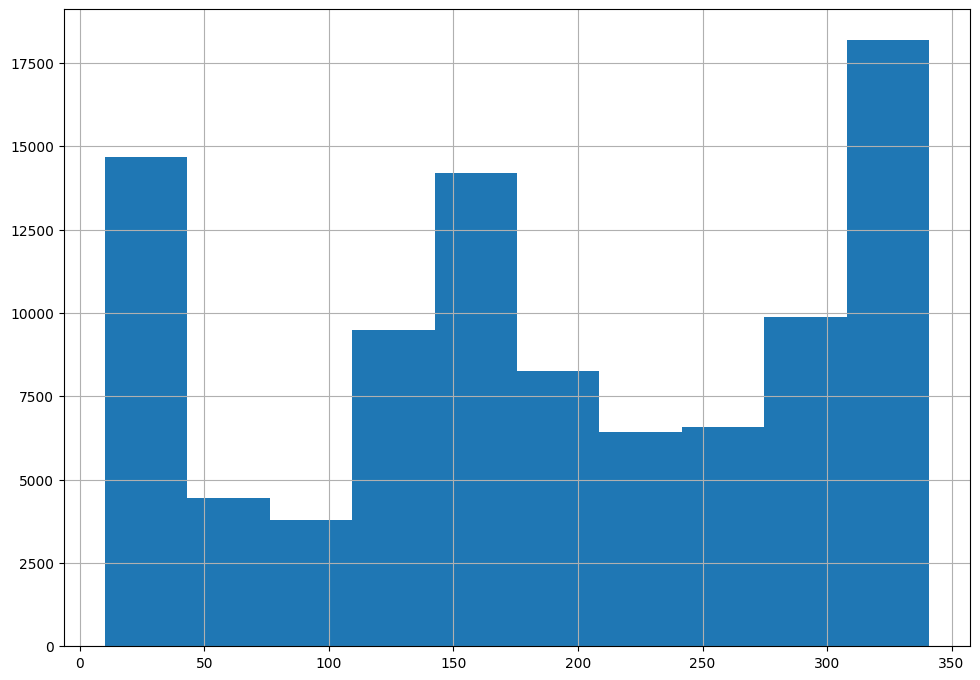

In [ ]:
transformation_object.plotQQ(cleaned_df, 'Wind Bearing (degrees)')
transformation_object.plotHist(cleaned_df,'Wind Bearing (degrees)')

### Histogram & Q-Q Plot for Visibility (km)

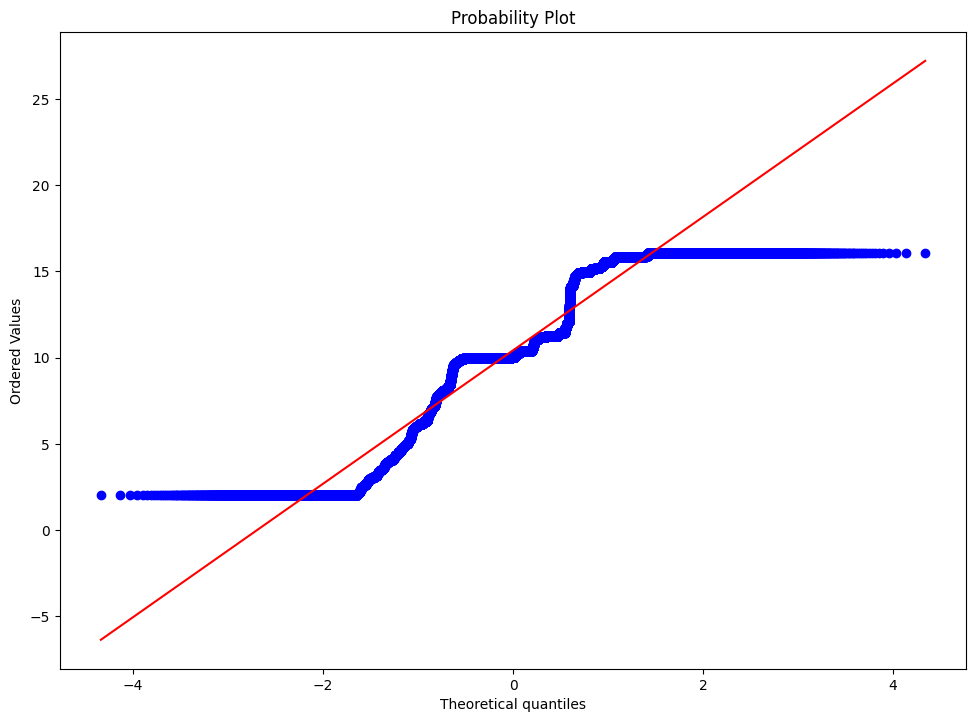

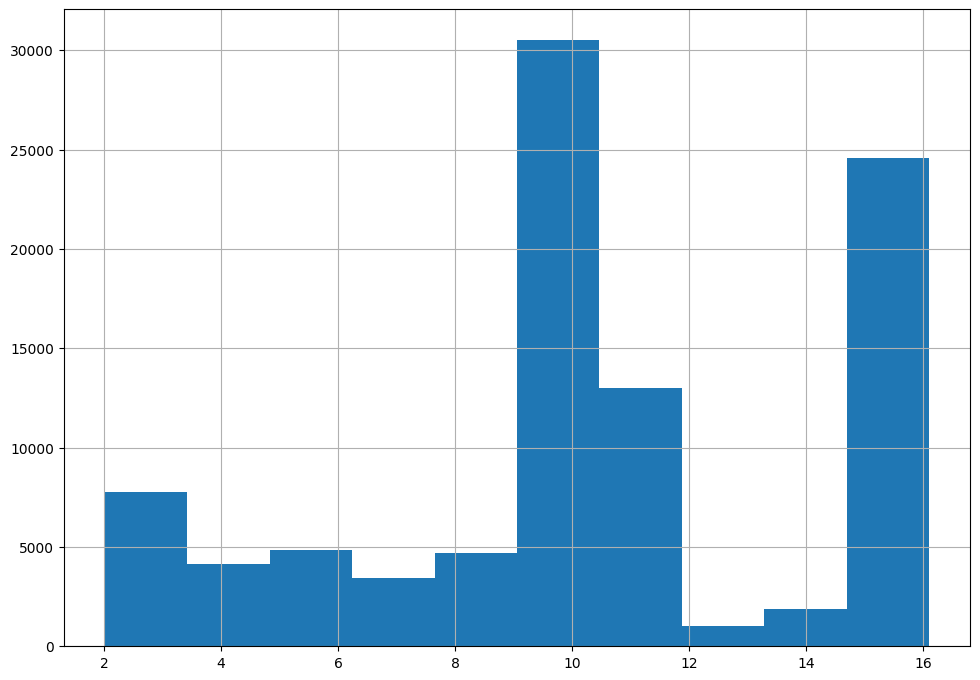

In [ ]:
transformation_object.plotQQ(cleaned_df, 'Visibility (km)')
transformation_object.plotHist(cleaned_df,'Visibility (km)')

### Histogram & Q-Q Plot for Pressure (millibars)

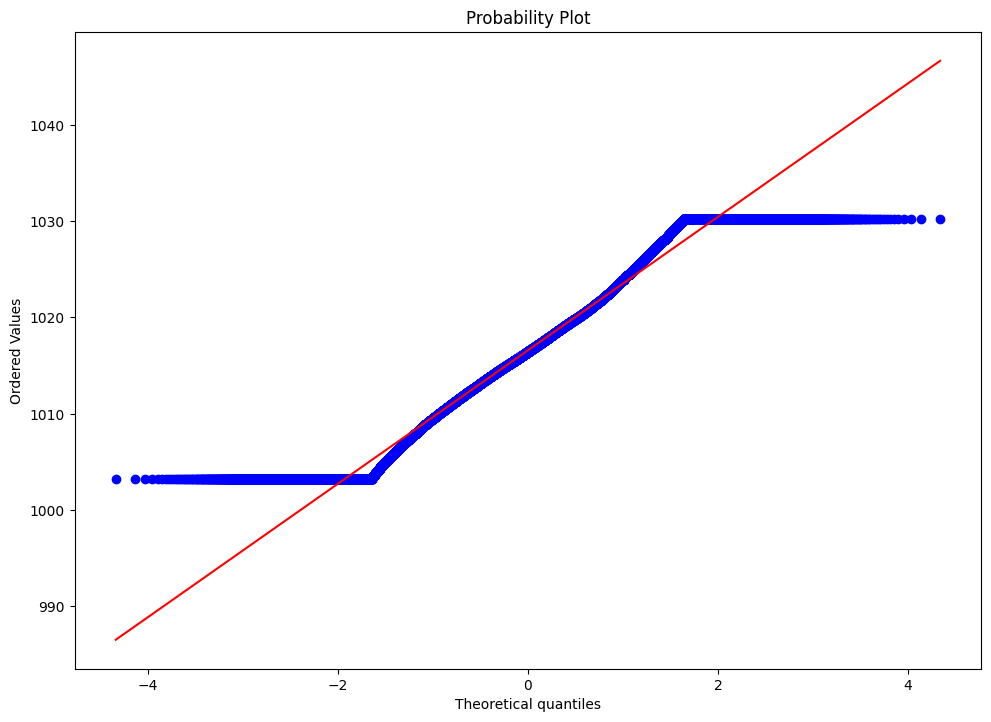

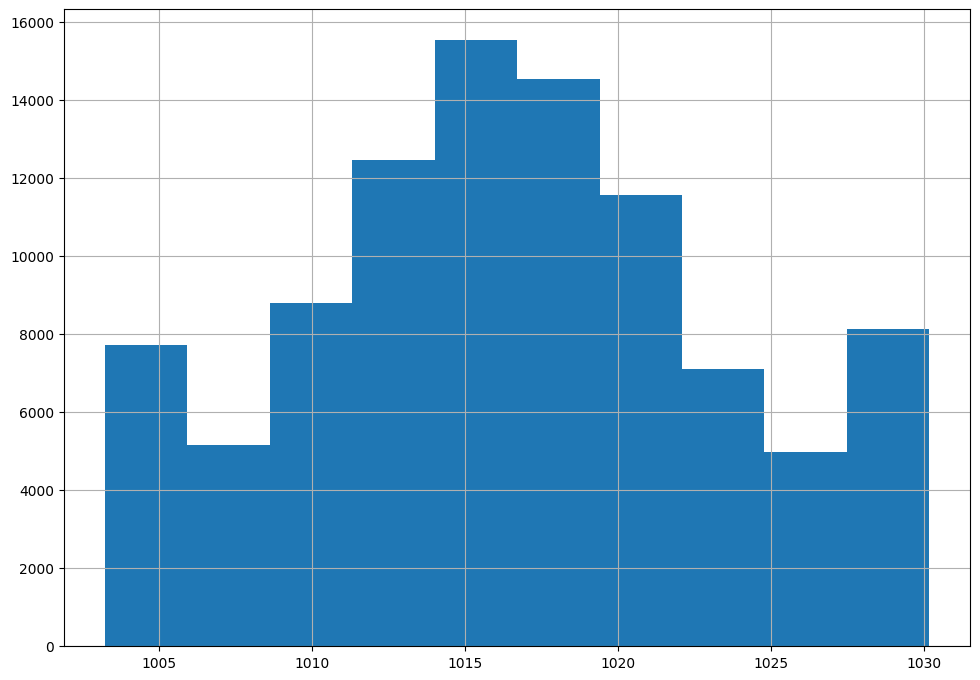

In [ ]:
transformation_object.plotQQ(cleaned_df, 'Pressure (millibars)')
transformation_object.plotHist(cleaned_df,'Pressure (millibars)')

##IV. Feature coding

In [ ]:
distinct_values = cleaned_df['Summary'].value_counts()
distinct_values

Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
mapping = {value: i for i, value in enumerate(cleaned_df['Summary'].unique())}

cleaned_df['Summary'] = cleaned_df['Summary'].map(mapping)

In [ ]:
distinct_values = cleaned_df['Precip Type'].value_counts()
distinct_values

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
cleaned_df['Precip Type'] = cleaned_df['Precip Type'].map({'rain': 0, 'snow': 1})

In [ ]:
distinct_values = cleaned_df['Daily Summary'].value_counts()
distinct_values

Mostly cloudy throughout the day.         20020
Partly cloudy throughout the day.          9930
Partly cloudy until night.                 6169
Partly cloudy starting in the morning.     5177
Foggy in the morning.                      4201
                                          ...  
Rain until afternoon.                        17
Rain until morning.                          12
Light rain in the morning.                   11
Drizzle starting in the evening.              9
Light rain overnight.                         3
Name: Daily Summary, Length: 214, dtype: int64

In [ ]:
mapping = {value: i for i, value in enumerate(cleaned_df['Daily Summary'].unique())}

cleaned_df['Daily Summary'] = cleaned_df['Daily Summary'].map(mapping)

In [ ]:
cleaned_df.head(10)

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,0,0,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0
1,0,0,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0
2,1,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0
3,0,0,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0
4,1,0,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0
5,0,0,7.111111,0.85,13.9587,258.0,14.9569,1016.66,0
6,0,0,5.522222,0.95,12.3648,259.0,9.9820,1016.72,0
7,0,0,6.527778,0.89,14.1519,260.0,9.9820,1016.84,0
8,0,0,10.822222,0.82,11.3183,259.0,9.9820,1017.37,0
9,0,0,13.772222,0.72,12.5258,279.0,9.9820,1017.22,0


In [ ]:
cleaned_df = cleaned_df.reset_index()

##V. Scale Function

In [ ]:
def scale_numeric_columns(df):
    numeric_columns = df.select_dtypes(include=['number']).columns

    scaler = MinMaxScaler()

    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    return df

scaled_df = scale_numeric_columns(cleaned_df)
scaled_df

,index,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,0.000000,0.000000,0.0,0.395360,0.870968,0.528634,0.728097,0.980571,0.441558,0.000000
1,0.000010,0.000000,0.0,0.390622,0.822581,0.535242,0.752266,0.980571,0.460111,0.000000
2,0.000021,0.038462,0.0,0.453847,0.870968,0.063877,0.586103,0.918857,0.471614,0.000000
3,0.000031,0.000000,0.0,0.352884,0.774194,0.527900,0.782477,0.980571,0.489054,0.000000
4,0.000042,0.038462,0.0,0.383271,0.774194,0.388399,0.752266,0.980571,0.492764,0.000000
...,...,...,...,...,...,...,...,...,...,...
95931,0.999958,0.000000,0.0,0.943147,0.129032,0.386197,0.063444,1.000000,0.412987,0.046948
95932,0.999969,0.000000,0.0,0.900997,0.209677,0.345081,0.030211,0.961143,0.442672,0.046948
95933,0.999979,0.000000,0.0,0.826172,0.338710,0.294420,0.060423,1.000000,0.461224,0.046948
95934,0.999990,0.000000,0.0,0.810979,0.403226,0.364905,0.030211,1.000000,0.471985,0.046948


##b) I. PCA



```
# This section applies dimensionality reduction using Principal Component Analysis on the preprocessed dataset. PCA reduces the dimensionality of the dataset while preserving as much variance as possible. This section calculates and visualizes explained variance ratios, cumulative explained variance, and eigenvalues to determine the optimal number of principal components.
```



In [ ]:
class DimensionReduction:

    def __init__(self):
        pass

    def applyPCA(self, df, n_components=None, column_names=None):
        pca = PCA(n_components=n_components)
        principalComponents = pca.fit_transform(df)
        principal_df = pd.DataFrame(data = principalComponents, columns = column_names)

        return principal_df, pca

    def plotCumVariance(self, pca):

        exp_var_pca = pca.explained_variance_ratio_
        cum_sum_eigenvalues = np.cumsum(exp_var_pca)

        plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
        plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal component index')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

    def plotThreshold(self, pca):

        exp_var_pca = pca.explained_variance_ratio_
        cum_sum_eigenvalues = np.cumsum(exp_var_pca)

        compo = len(exp_var_pca)

        plt.ylim(0.0,1.1)
        plt.plot(np.arange(1, compo+1, step=1), cum_sum_eigenvalues, marker='o', linestyle='--', color='b')

        plt.xlabel('Number of Components')
        plt.xticks(np.arange(0, compo, step=1))
        plt.ylabel('Cumulative variance (%)')
        plt.title('The number of components needed to explain variance')

        plt.axhline(y=0.99, color='r', linestyle='-')
        plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

        plt.show()

    def screePlot(self, pca):
        plt.style.use("ggplot")
        plt.plot(pca.explained_variance_, marker='o')
        plt.xlabel("Eigenvalue number")
        plt.ylabel("Eigenvalue size")
        plt.title("Scree Plot")

In [ ]:
dm_reduce = DimensionReduction()

In [ ]:
principal_df, pca = dm_reduce.applyPCA(
    df=scaled_df,
    n_components=None
)

principal_df

,0,1,2,3,4,5,6,7,8,9
0,-0.058181,0.305379,0.156562,-0.170889,-0.216372,-0.581337,-0.069797,-0.121493,-0.056996,-0.044453
1,-0.076925,0.321759,0.180215,-0.175246,-0.182297,-0.565388,-0.085179,-0.117479,-0.035392,-0.042792
2,0.010914,0.005851,0.001667,-0.468858,-0.177402,-0.530460,0.054591,-0.011613,0.017924,-0.009258
3,-0.073828,0.341077,0.198866,-0.184717,-0.139159,-0.558888,-0.111415,-0.106136,0.009628,-0.041180
4,-0.068481,0.261361,0.148129,-0.276844,-0.121206,-0.554017,-0.065977,-0.069206,0.022421,-0.003672
...,...,...,...,...,...,...,...,...,...,...
95931,-0.709420,-0.574536,-0.082170,0.377537,0.296167,0.073588,0.162688,-0.019895,0.000607,-0.022917
95932,-0.618866,-0.610493,-0.125041,0.356475,0.265364,0.064213,0.138888,-0.018786,-0.007857,-0.026903
95933,-0.523415,-0.584406,-0.212925,0.330679,0.253908,-0.030455,0.124623,-0.012674,-0.015213,-0.030454
95934,-0.489275,-0.581314,-0.208746,0.386333,0.213441,-0.057109,0.091880,-0.037805,-0.060410,-0.032805


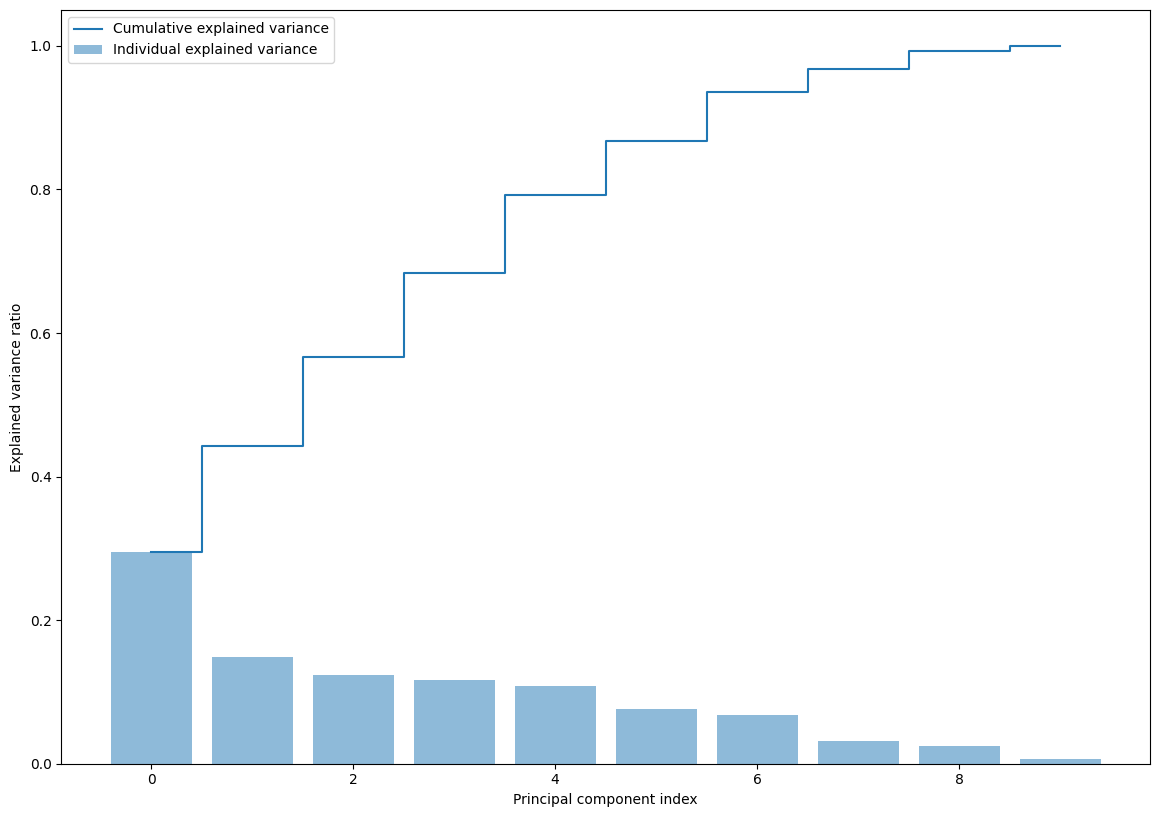

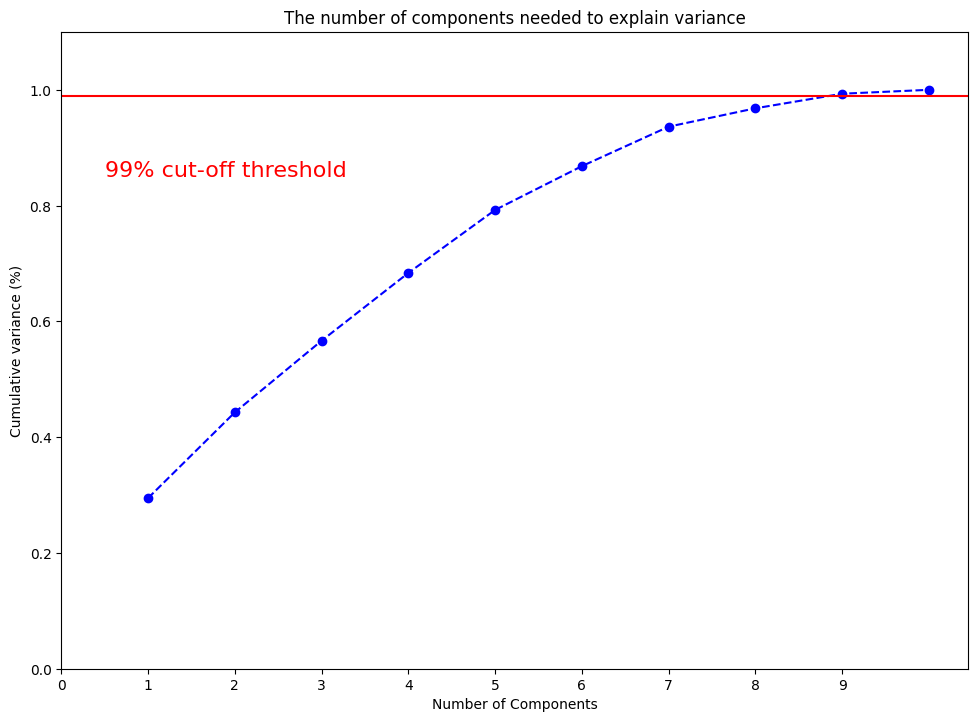

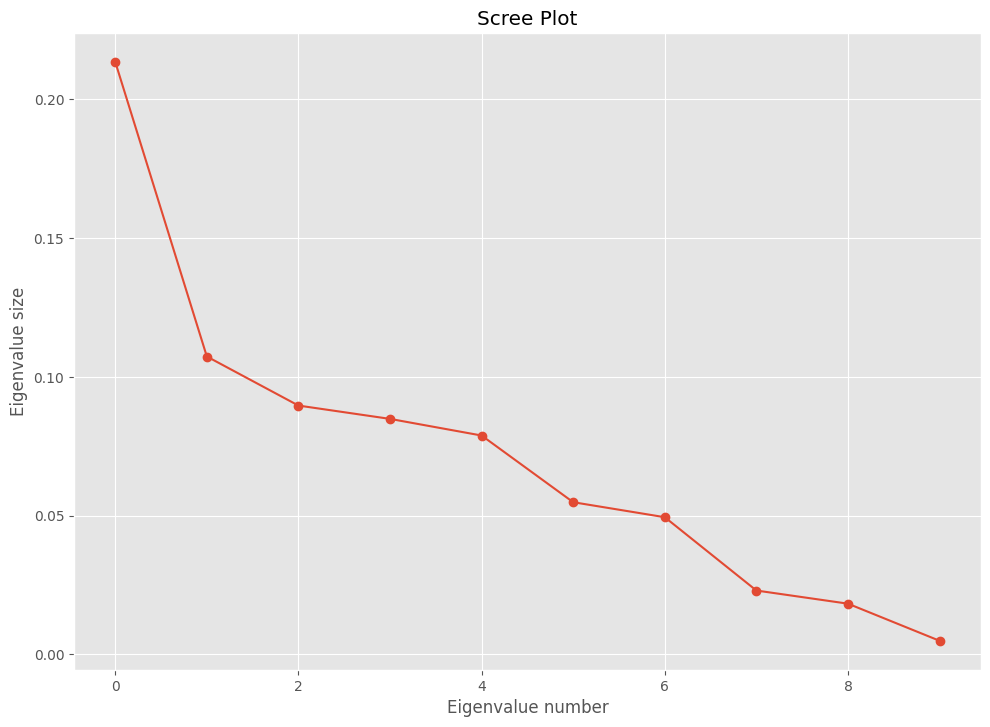

In [ ]:
dm_reduce.plotCumVariance(pca)
dm_reduce.plotThreshold(pca)
dm_reduce.screePlot(pca)

In [ ]:
principal_df_2, pca = dm_reduce.applyPCA(
    df=scaled_df,
    n_components=0.99,
    column_names=None
)

principal_df_2

,0,1,2,3,4,5,6,7,8
0,-0.058181,0.305379,0.156562,-0.170889,-0.216372,-0.581337,-0.069797,-0.121493,-0.056996
1,-0.076925,0.321759,0.180215,-0.175246,-0.182297,-0.565388,-0.085179,-0.117479,-0.035392
2,0.010914,0.005851,0.001667,-0.468858,-0.177402,-0.530460,0.054591,-0.011613,0.017924
3,-0.073828,0.341077,0.198866,-0.184717,-0.139159,-0.558888,-0.111415,-0.106136,0.009628
4,-0.068481,0.261361,0.148129,-0.276844,-0.121206,-0.554017,-0.065977,-0.069206,0.022421
...,...,...,...,...,...,...,...,...,...
95931,-0.709420,-0.574536,-0.082170,0.377537,0.296167,0.073588,0.162688,-0.019895,0.000607
95932,-0.618866,-0.610493,-0.125041,0.356475,0.265364,0.064213,0.138888,-0.018786,-0.007857
95933,-0.523415,-0.584406,-0.212925,0.330679,0.253908,-0.030455,0.124623,-0.012674,-0.015213
95934,-0.489275,-0.581314,-0.208746,0.386333,0.213441,-0.057109,0.091880,-0.037805,-0.060410


In [ ]:
principal_df_final, pca = dm_reduce.applyPCA(
    df=scaled_df,
    n_components=9,
    column_names=["PCA_0", "PCA_1", "PCA_2", "PCA_3", "PCA_4", "PCA_5", "PCA_6", "PCA_7", "PCA_8"]
)

principal_df_final

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
0,-0.058181,0.305379,0.156562,-0.170889,-0.216372,-0.581337,-0.069797,-0.121493,-0.056996
1,-0.076925,0.321759,0.180215,-0.175246,-0.182297,-0.565388,-0.085179,-0.117479,-0.035392
2,0.010914,0.005851,0.001667,-0.468858,-0.177402,-0.530460,0.054591,-0.011613,0.017924
3,-0.073828,0.341077,0.198866,-0.184717,-0.139159,-0.558888,-0.111415,-0.106136,0.009628
4,-0.068481,0.261361,0.148129,-0.276844,-0.121206,-0.554017,-0.065977,-0.069206,0.022421
...,...,...,...,...,...,...,...,...,...
95931,-0.709420,-0.574536,-0.082170,0.377537,0.296167,0.073588,0.162688,-0.019895,0.000607
95932,-0.618866,-0.610493,-0.125041,0.356475,0.265364,0.064213,0.138888,-0.018786,-0.007857
95933,-0.523415,-0.584406,-0.212925,0.330679,0.253908,-0.030455,0.124623,-0.012674,-0.015213
95934,-0.489275,-0.581314,-0.208746,0.386333,0.213441,-0.057109,0.091880,-0.037805,-0.060410


##Model development



```
# In this section splits the dataset into training and testing sets, and it evaluates multiple machine learning models:
Linear Regression
Lasso Regression
Ridge Regression
For each model, the code performs 10-fold cross-validation, calculates the Root Mean Squared Error (RMSE), and measures the R-squared (R2) for model evaluation. It also includes data visualization to compare actual and predicted values.
```



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principal_df_final, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(76748, 9) (76748,)
(19188, 9) (19188,)


In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

##Evaluation Functions

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

def rmse(y, pred):
    return sqrt(mean_squared_error(y, pred))

def r2_score(y, pred):
    return metrics.r2_score(y, pred)

def cross_validate_score(model, x, y):
    results = cross_val_score(model, x, y, cv=cv)
    return results

def cross_validate_predict(model, x, y):
    predictions = cross_val_predict(model, x, y, cv=cv)
    return predictions

##C) I. Linear Regression

In [ ]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

linear_scores = cross_validate_score(linear_regressor, X_train, y_train)
for i in range(len(linear_scores)):
    print("Fold %d Score: %.3f" %(i, linear_scores[i]))

print("10 Fold Cross Validation Score: ", np.mean(linear_scores))

Fold 0 Score: 0.977
Fold 1 Score: 0.979
Fold 2 Score: 0.978
Fold 3 Score: 0.977
Fold 4 Score: 0.978
Fold 5 Score: 0.978
Fold 6 Score: 0.977
Fold 7 Score: 0.976
Fold 8 Score: 0.977
Fold 9 Score: 0.978
10 Fold Cross Validation Score:  0.977659671433537


In [ ]:
linear_predictions = linear_regressor.predict(X_test)

In [ ]:
print('Test RMSE: %.3f' % rmse(y_test, linear_predictions))
print("Test Accuracy:", r2_score(y_test, linear_predictions))

Test RMSE: 1.422
Test Accuracy: 0.9778935120385769


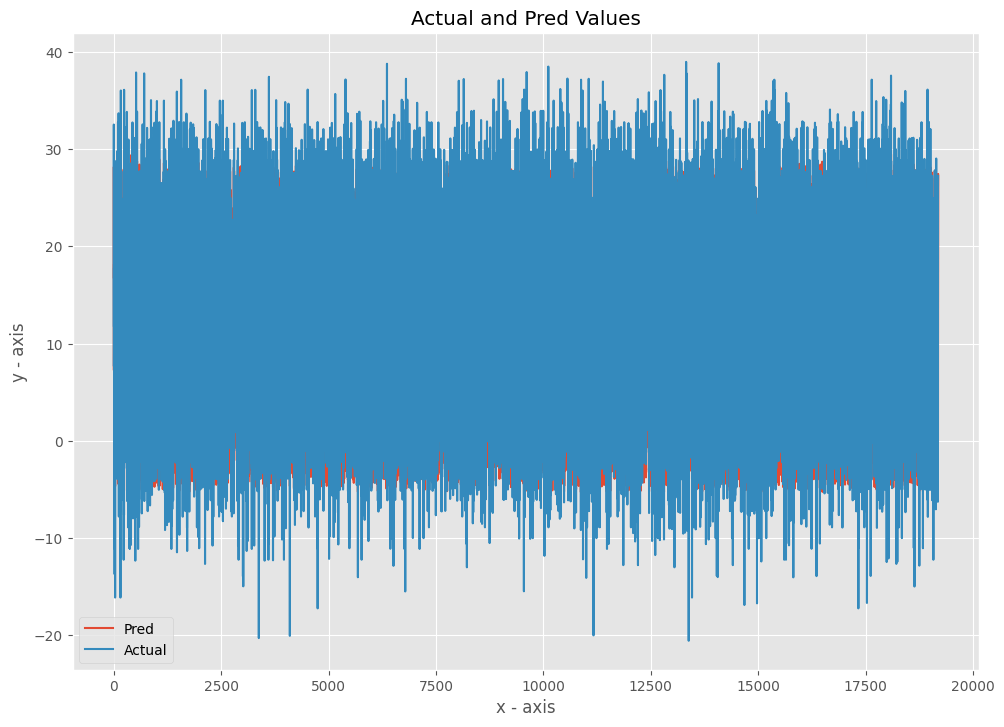

In [ ]:
plt.plot(linear_predictions, '-', label = "Pred")
plt.plot(y_test, '-', label = "Actual")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Actual and Pred Values')
plt.legend()

plt.show()

##II. Lasso

In [ ]:
lasso_regressor = linear_model.Lasso(alpha=0.01)
lasso_regressor.fit(X_train, y_train)

lasso_scores = cross_validate_score(lasso_regressor, X_train, y_train)
for i in range(len(lasso_scores)):
    print("Fold %d Score: %.3f" %(i, lasso_scores[i]))

print("10 Fold Cross Validation Score: ", np.mean(lasso_scores))

Fold 0 Score: 0.976
Fold 1 Score: 0.979
Fold 2 Score: 0.978
Fold 3 Score: 0.977
Fold 4 Score: 0.978
Fold 5 Score: 0.978
Fold 6 Score: 0.977
Fold 7 Score: 0.976
Fold 8 Score: 0.977
Fold 9 Score: 0.978
10 Fold Cross Validation Score:  0.9774704596166404


In [ ]:
lasso_predictions = lasso_regressor.predict(X_test)

In [ ]:
print('Test RMSE: %.3f' % rmse(y_test, lasso_predictions))
print("Test Accuracy:", r2_score(y_test, lasso_predictions))

Test RMSE: 1.428
Test Accuracy: 0.9777123048202274


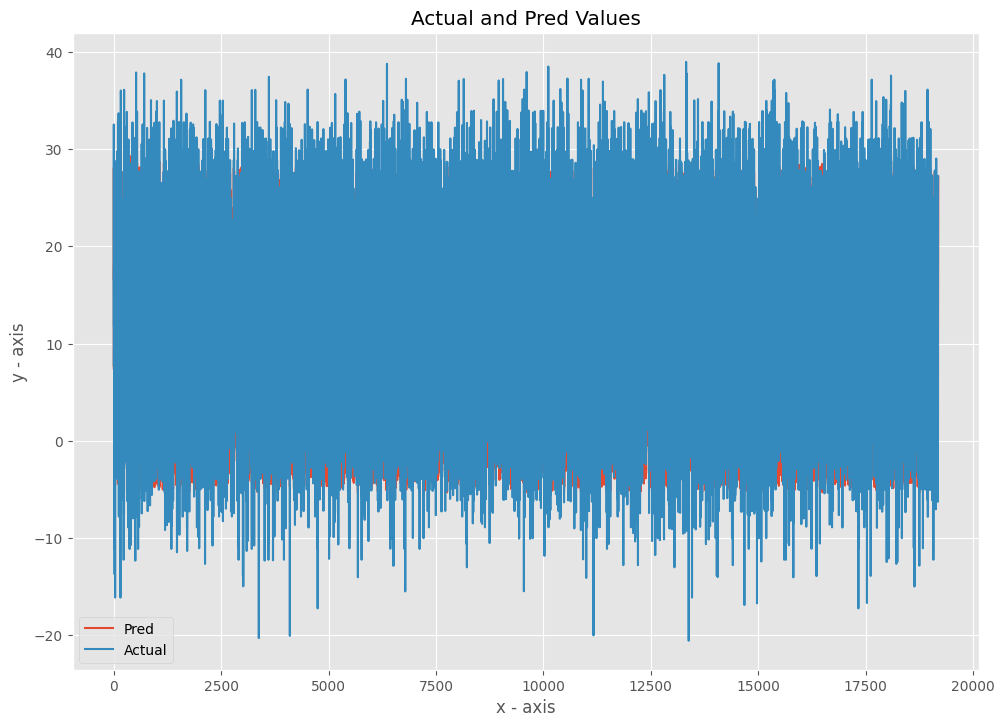

In [ ]:
plt.plot(lasso_predictions, '-', label = "Pred")
plt.plot(y_test, '-', label = "Actual")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Actual and Pred Values')
plt.legend()

plt.show()

##III. Ridge

In [ ]:
ridge_regressor = linear_model.Ridge(alpha=0.01)
ridge_regressor.fit(X_train, y_train)

ridge_scores = cross_validate_score(ridge_regressor, X_train, y_train)
for i in range(len(ridge_scores)):
    print("Fold %d Score: %.3f" %(i, ridge_scores[i]))

print("10 Fold Cross Validation Score: ", np.mean(ridge_scores))

Fold 0 Score: 0.977
Fold 1 Score: 0.979
Fold 2 Score: 0.978
Fold 3 Score: 0.977
Fold 4 Score: 0.978
Fold 5 Score: 0.978
Fold 6 Score: 0.977
Fold 7 Score: 0.976
Fold 8 Score: 0.977
Fold 9 Score: 0.978
10 Fold Cross Validation Score:  0.9776596715182805


In [ ]:
ridge_predictions = ridge_regressor.predict(X_test)

In [ ]:
print('Test RMSE: %.3f' % rmse(y_test, ridge_predictions))
print("Test Accuracy:", r2_score(y_test, ridge_predictions))

Test RMSE: 1.422
Test Accuracy: 0.9778935069861946


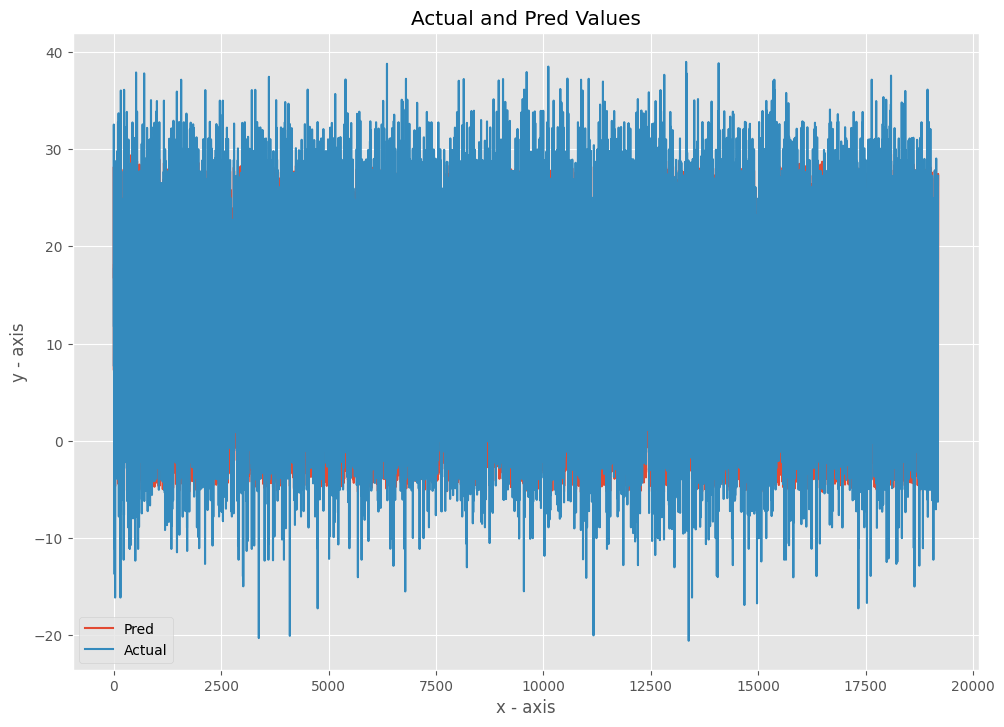

In [ ]:
plt.plot(ridge_predictions, '-', label = "Pred")
plt.plot(y_test, '-', label = "Actual")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Actual and Pred Values')
plt.legend()

plt.show()